<div style="line-height:0.45">
<h1 style="color:#0FA345  "> Linear Discriminant Analysis </h1>
<div style="line-height:1.3">
<h4> Data Pre-processing + Classification method (last step exploiting a sdd Linear Classification alg.  </h4>
</div>
<h3 style="color:lightblue"> Keywords: </h3> StandardScaler + pandas missing value + ListedColormap + plt horizontal legend
</div>

<h3 style="color:#0FA345  "> Recap: </h3>
<div style="margin-top: -8px;">
LDA is a dimensionality reduction technique (that consider target labels in the process) This feature transformation technique results in a linear decision boundary when applied to classification problems. <br>
It seeks to obtain the linear combination of features that maximally separates different classes or categories, by finding a projection that maximizes the between-class scatter while minimizing the within-class scatter. <br>
Therefore, the linear decision boundary is generated by fitting class conditional densities to the data. <br>
</div>

In [119]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

In [51]:
# Load the banknote dataset 
rows = [] 
# Open file
with open('./data_to_use/data_banknote_authentication.txt') as file:
    data = file.readlines()
    for line in data:
        rows.append(line.split(','))
        rows = [[val.rstrip('\n') for val in row] for row in rows]

rows[:5]

[['3.6216', '8.6661', '-2.8073', '-0.44699', '0'],
 ['4.5459', '8.1674', '-2.4586', '-1.4621', '0'],
 ['3.866', '-2.6383', '1.9242', '0.10645', '0'],
 ['3.4566', '9.5228', '-4.0112', '-3.5944', '0'],
 ['0.32924', '-4.4552', '4.5718', '-0.9888', '0']]

### => Create DataFrame and adjust data

In [52]:
df_banknote = pd.DataFrame(rows)
print(df_banknote)
print(df_banknote.dtypes)

df_bank = df_banknote.apply(pd.to_numeric, errors='coerce')
print(df_bank)
print(df_bank.dtypes)

            0         1        2         3  4
0      3.6216    8.6661  -2.8073  -0.44699  0
1      4.5459    8.1674  -2.4586   -1.4621  0
2       3.866   -2.6383   1.9242   0.10645  0
3      3.4566    9.5228  -4.0112   -3.5944  0
4     0.32924   -4.4552   4.5718   -0.9888  0
...       ...       ...      ...       ... ..
1367  0.40614    1.3492  -1.4501  -0.55949  1
1368  -1.3887   -4.8773   6.4774   0.34179  1
1369  -3.7503  -13.4586  17.5932   -2.7771  1
1370  -3.5637   -8.3827   12.393   -1.2823  1
1371  -2.5419  -0.65804   2.6842    1.1952  1

[1372 rows x 5 columns]
0    object
1    object
2    object
3    object
4    object
dtype: object
            0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -

In [53]:
# Clarify name of the features 
proper_column_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
df_bank.columns = proper_column_names
df_bank.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [54]:
### Split dataset into training and test
X = df_bank.iloc[:, :-1]
Y = df_bank.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X,  Y, test_size=0.2, random_state=39)

In [55]:
print("X_train", X_train.shape)
X_train[:10]

X_train (1097, 4)


,Variance,Skewness,Curtosis,Entropy
148,3.627700,0.98290,0.68861,0.634030
51,5.262000,3.98340,-1.55720,1.010300
1045,-0.014902,-1.02430,-0.94024,0.649550
155,2.486000,-0.99533,5.34040,-0.154750
500,3.864400,3.70610,0.70403,0.352140
470,0.872560,9.29310,-0.78430,-2.197800
576,0.324440,10.06700,-1.19820,-4.128400
478,-1.778100,0.85460,7.13030,0.027572
298,1.143000,0.83391,5.45520,-0.569840
193,4.827200,3.06870,0.68604,0.807310


In [56]:
print("Y_train", Y_train.shape)
Y_train[:10]

Y_train (1097,)


148     0
51      0
1045    1
155     0
500     0
470     0
576     0
478     0
298     0
193     0
Name: Class, dtype: int64

In [57]:
# Check that there is no missing value
df_bank.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [58]:
""" Scaling Features """
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

<div style="margin-bottom: -20px;">
<h2 style="color:#0AE42F  "> Feature Extraction using LDA </h2>
</div>
LDA can generate at most "min(n_features, n_classes - 1)" components.     <br>
It is necessary to choose a value of to avoid the error => ValueError: n_components cannot be larger than "min(n_features, n_classes - 1)". <br>     
In this case LDA can only generate a maximum of 1 component since there are very few features. 

In [59]:
# Get max number of components that can be used 
print(min(X_train.shape[1], len(np.unique(Y_train)) - 1))

1


In [60]:
# Initialize the Linear Discriminant Analysis object => n_components = 2 is too much!
lda = LDA(n_components = 1);

In [61]:
# Train the model, fitting to data and transforming it directly.
X_train = lda.fit_transform(X_train, Y_train)
X_train[:10]

array([[-1.82934534],
       [-3.26888979],
       [ 3.16518414],
       [-2.71991079],
       [-3.30372178],
       [-2.44826328],
       [-2.07158699],
       [-1.0475411 ],
       [-2.49857573],
       [-3.81693037]])

In [62]:
X_test = lda.transform(X_test)
X_test[:10]

array([[ 3.68288991],
       [ 3.54159315],
       [ 3.68675222],
       [-2.08277786],
       [ 3.57170047],
       [-1.87172332],
       [-3.04994894],
       [ 1.96964229],
       [-4.03912772],
       [-2.10192007]])

In [63]:
""" Get the amount of variance explained by each linear discriminant. """
explained_varience = lda.explained_variance_ratio_
explained_varience

array([1.])

### => Change dataset to get meaningful results for LDA

In [64]:
dataset_ok = pd.read_csv('./data_to_use/supermarket_sales - Sheet1.csv')
dataset_ok

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [65]:
# Remove useless ID column
dataset_ok.drop('Invoice ID', axis=1, inplace=True)
dataset_ok

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [66]:
other_cols_to_remove = ['Date', 'Time'] 

# Index the DataFrame to exclude certain columns
df_to_use = dataset_ok[[col for col in dataset_ok.columns if col not in other_cols_to_remove]]

df_to_use.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [67]:
""" Label Encoding for categorical data """
cat_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

le = LabelEncoder()
for col in cat_cols:
    df_to_use[col] = le.fit_transform(df_to_use[col])
    
print(df_to_use.head())

   Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0       0     2              0       0             3       74.69         7   
1       2     1              1       0             0       15.28         5   
2       0     2              1       1             4       46.33         7   
3       0     2              0       1             3       58.22         8   
4       0     2              1       1             5       86.31         7   

    Tax 5%     Total  Payment    cogs  gross margin percentage  gross income  \
0  26.1415  548.9715        2  522.83                 4.761905       26.1415   
1   3.8200   80.2200        0   76.40                 4.761905        3.8200   
2  16.2155  340.5255        1  324.31                 4.761905       16.2155   
3  23.2880  489.0480        2  465.76                 4.761905       23.2880   
4  30.2085  634.3785        2  604.17                 4.761905       30.2085   

   Rating  
0     9.1  
1     9.6  
2     7.4  
3 

In [68]:
X_ok = df_to_use.iloc[:, :-1]
Y_ok = df_to_use.iloc[:, -1]

In [69]:
lab_enc_for_y = LabelEncoder() 
Y = lab_enc_for_y.fit_transform(Y_ok)

In [70]:
### Split dataset into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X_ok,  Y, test_size=0.2, random_state=13)

In [71]:
print("X_train", X_train.shape)
X_train[:10]

X_train (800, 13)


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income
133,1,0,0,1,0,87.45,6,26.2350,550.9350,1,524.70,4.761905,26.2350
233,1,0,0,1,1,73.82,4,14.7640,310.0440,0,295.28,4.761905,14.7640
643,2,1,0,0,2,72.52,8,29.0080,609.1680,1,580.16,4.761905,29.0080
497,2,1,1,0,2,90.24,6,27.0720,568.5120,0,541.44,4.761905,27.0720
281,2,1,1,1,4,37.00,1,1.8500,38.8500,1,37.00,4.761905,1.8500
224,0,2,1,1,2,43.25,2,4.3250,90.8250,0,86.50,4.761905,4.3250
926,1,0,0,1,5,88.31,1,4.4155,92.7255,1,88.31,4.761905,4.4155
183,2,1,1,1,3,34.31,8,13.7240,288.2040,2,274.48,4.761905,13.7240
437,0,2,1,1,4,33.99,6,10.1970,214.1370,1,203.94,4.761905,10.1970
762,0,2,0,0,1,63.88,8,25.5520,536.5920,2,511.04,4.761905,25.5520


In [72]:
print("Y_train", Y_train.shape)
Y_train[:10]

Y_train (800,)


array([48, 27,  0, 22, 39, 22, 12, 17, 37, 59])

In [73]:
# Standardize features by removing the mean and scaling to unit variance
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [74]:
X_train, X_test

(array([[ 0.03223685, -1.22223494, -0.99252792, ...,  0.95761529,
          0.        ,  0.95761529],
        [ 0.03223685, -1.22223494, -0.99252792, ..., -0.02917659,
          0.        , -0.02917659],
        [ 1.26030729, -0.01060179, -0.99252792, ...,  1.1961624 ,
          0.        ,  1.1961624 ],
        ...,
        [-1.19583359,  1.20103136,  1.00752834, ...,  1.59131788,
          0.        ,  1.59131788],
        [-1.19583359,  1.20103136, -0.99252792, ..., -0.53637953,
          0.        , -0.53637953],
        [ 1.26030729, -0.01060179,  1.00752834, ..., -0.68438541,
          0.        , -0.68438541]]),
 array([[-1.19583359,  1.20103136,  1.00752834, ...,  1.52735835,
          0.        ,  1.52735835],
        [-1.19583359,  1.20103136,  1.00752834, ...,  0.06876278,
          0.        ,  0.06876278],
        [ 0.03223685, -1.22223494,  1.00752834, ..., -0.78447541,
          0.        , -0.78447541],
        ...,
        [ 1.26030729, -0.01060179, -0.99252792, ..., -

In [75]:
len(X_train), len(X_test)

(800, 200)

In [76]:
print(min(X_train.shape[1], len(np.unique(Y_train)) - 1))

13


In [77]:
""" Define the Linear Discriminant Analysis Classifier. """
lda = LDA(n_components = 2);

In [78]:
# Train the model giving data and labels, by fitting to data and transforming them directly.
X_train_lda = lda.fit_transform(X_train, Y_train)
X_train_lda[:10]

array([[-0.52736557, -1.28578509],
       [-0.54356005, -1.64902051],
       [ 0.37465367,  0.12559513],
       [ 0.96912873, -0.03357882],
       [ 1.12306667,  0.385139  ],
       [ 1.18984641, -0.16453569],
       [-1.52371334, -1.24396442],
       [-1.38232454,  0.6666693 ],
       [-0.34337542,  1.17785068],
       [ 0.314752  ,  0.2277725 ]])

In [79]:
X_test_lda = lda.transform(X_test)
X_test_lda[:10]

array([[ 1.41625223,  0.19814166],
       [ 0.76628712,  0.46152321],
       [-1.05716763, -0.98198189],
       [-0.12369531,  0.03928012],
       [ 0.93221457, -1.85639815],
       [-0.88233578, -0.55412481],
       [ 1.56586334,  0.75832103],
       [ 0.56796926,  1.57725694],
       [ 0.92880633,  0.81920819],
       [-1.15709686,  0.41914372]])

In [80]:
explained_varience = lda.explained_variance_ratio_
explained_varience

array([0.16141006, 0.1533235 ])

<div style="line-height:0.5">
<h2 style="color:#0AE42F  "> Make predictions on (transformed) test data using various classifiers </h2>
</div>
After performing LDA transformation, you need to train a classification model on the transformed features. <br>
We can choose the std classification algorithm that best suits your problem. <br>

+ Logistic Regression
+ Naive Bayes 
+ Decision Trees
+ Random Forest
+ Support Vector Machine
+ Adaboost

#### => 1) Logistic Regression classifier



In [81]:
LG = LogisticRegression(random_state=0)
# Fit the model to the LDA-transformed training data
LG.fit(X_train_lda, Y_train)
# Make predictions on the LDA-transformed test data
y_pred = LG.predict(X_test_lda)
y_pred

array([32, 25, 30, 25, 55, 20, 32, 34, 25, 11, 11, 55, 58, 25, 30, 25, 55,
        2,  2, 20,  2, 58, 25, 30, 11, 20, 20, 30, 20, 25, 25, 25, 20, 25,
        8, 30, 20, 34, 20,  8, 20,  2, 25, 47,  2, 47,  2, 55, 20, 25, 25,
       25, 25, 22, 20, 32, 25, 22, 55, 34, 20,  2, 11, 30, 20,  8, 55, 25,
       30,  2, 11, 25, 20, 30, 20, 22, 25, 30, 20, 25, 58, 55, 55, 20,  2,
       58, 47, 25, 20, 11, 25,  2, 34, 34, 55, 27, 55, 47, 20, 47, 20,  8,
       20, 58, 27, 58,  2, 25, 20, 55, 32, 47, 25,  2, 55, 30,  2, 25, 47,
       25,  2, 25, 58, 58, 55, 25, 25, 55, 25, 32, 20, 55, 30,  8, 20, 25,
       30, 25,  2, 58, 25, 22, 11, 25, 20,  2, 20, 30, 55, 22,  2,  2,  2,
       47, 25, 25,  2, 20,  2,  2, 25, 58, 20,  8, 27, 20,  2,  2, 55, 30,
       25, 55, 11, 20, 20, 25, 25, 58, 25, 20, 20, 11, 32, 25,  2, 34, 30,
       58, 22, 11,  2, 20, 34, 32, 11, 55, 25, 58, 30, 34])

In [82]:
confusion_matrix = confusion_matrix(Y_test, y_pred)
confusion_matrix

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

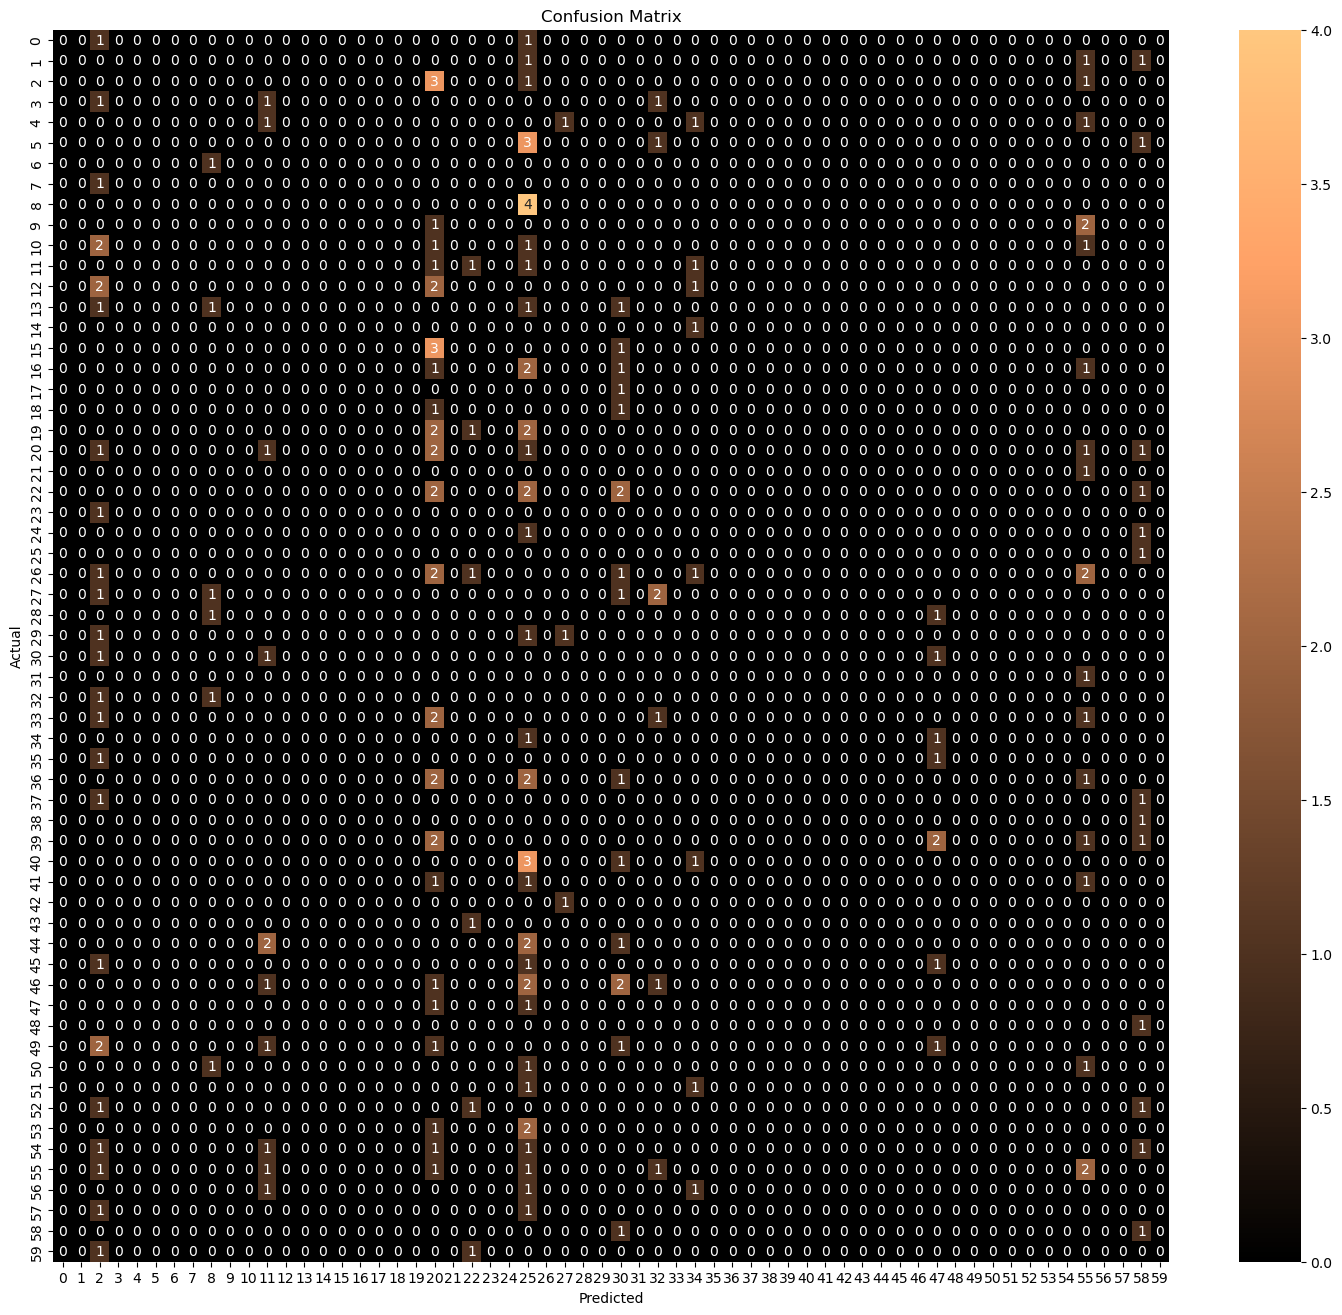

In [83]:
##### Show confusion matrix heatmap 
plt.figure(figsize=(18, 16))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

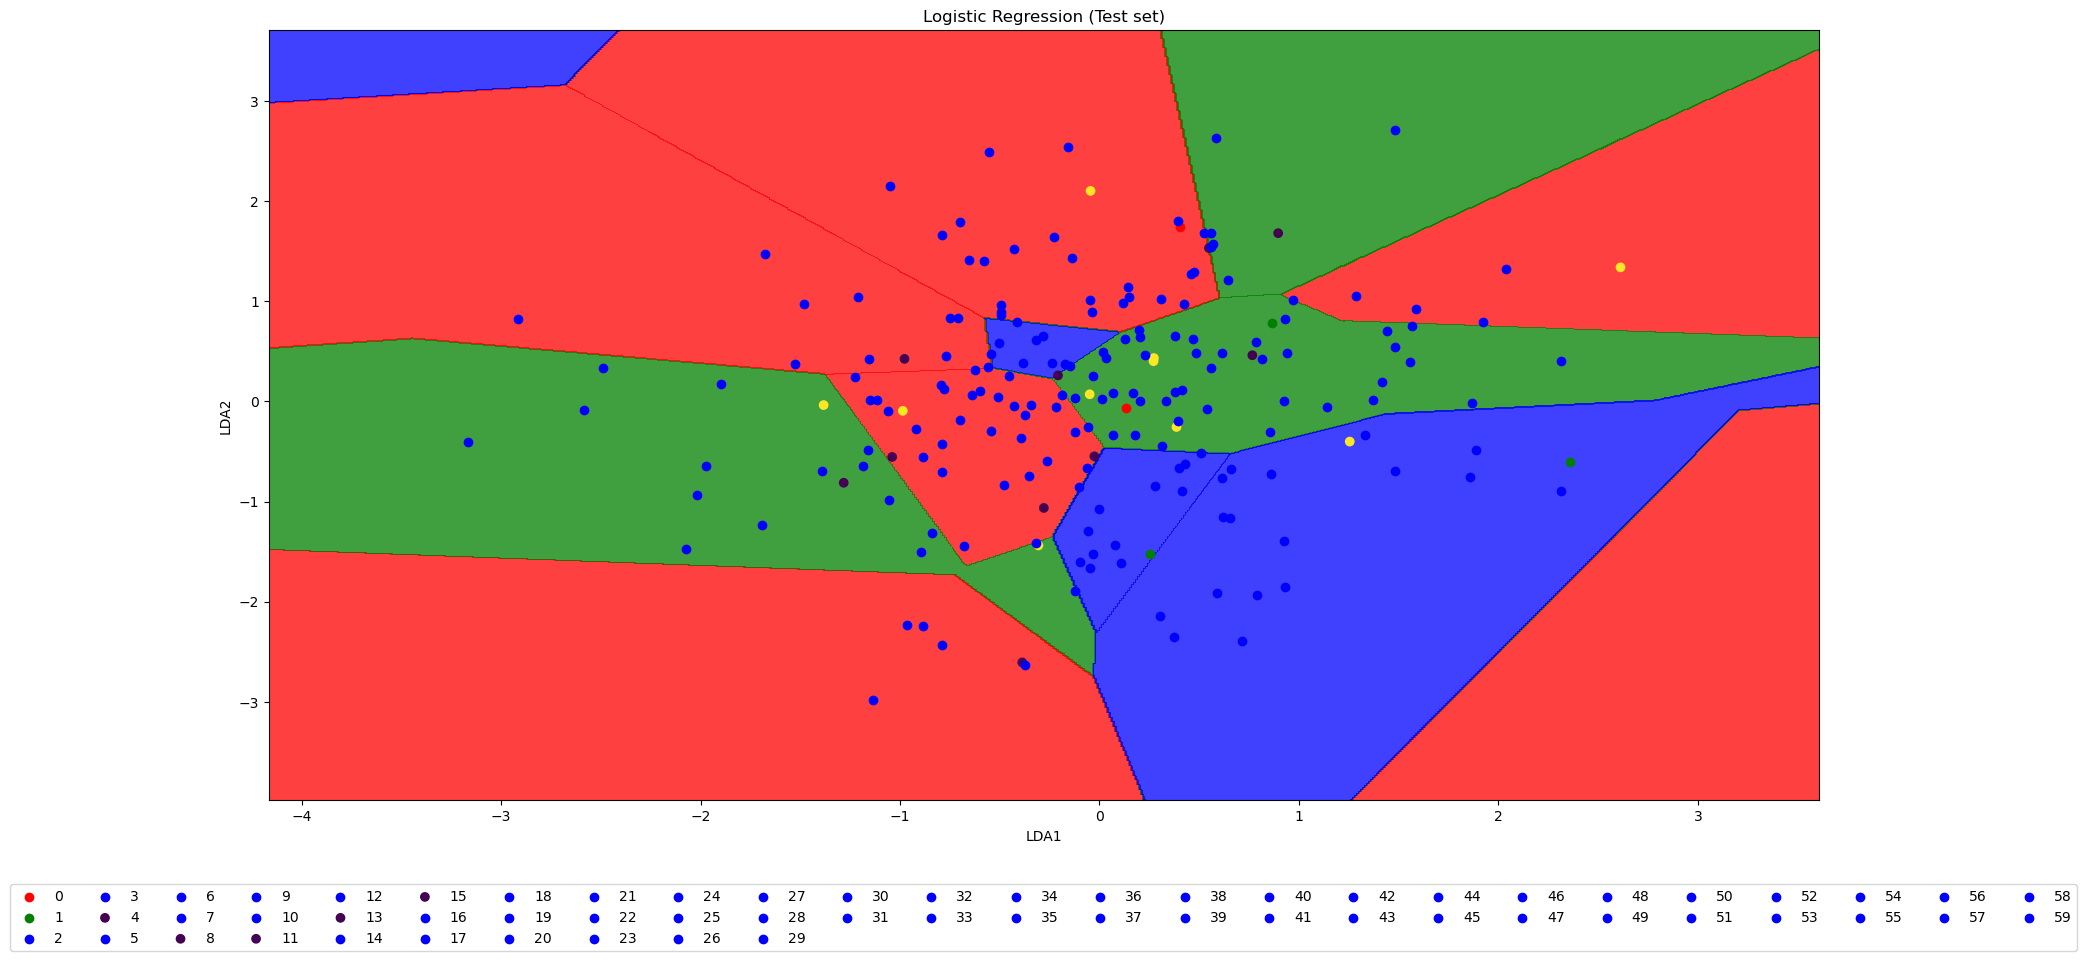

In [106]:
X_set, y_set = X_test_lda, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(20,10))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

# Set limit an axes 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot 
"""
    - `i` represents the class label
    - `j` represents the class value (unique class labels)
For each class, scatter points using the first two features (X_set[:, 0] and X_set[:, 1]).
Use a color from the 'red', 'green', 'blue' colormap based on the class index (i).
Label each scatter plot with the class value (j).
"""
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
# Horizontal legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=25)
plt.show()

### => 2) Naive Bayes

In [90]:
# Create a Gaussian Naive Bayes model
nb_classifier = GaussianNB()
# Fit the model to the LDA-transformed training data
nb_classifier.fit(X_train_lda, Y_train)
# Make predictions on the LDA-transformed test data
y_pred_nb = nb_classifier.predict(X_test_lda)

y_pred_nb

array([22,  4, 30, 45, 58, 30, 22,  4, 22, 11,  2, 58, 58, 51, 30, 45, 45,
        4,  4, 29, 34, 58,  4, 47, 11, 59, 59, 47, 54,  4, 45,  2, 30,  2,
       20, 20, 30,  4, 59, 20, 30,  2,  4,  2,  2,  2,  2, 58, 59,  4, 22,
        4,  4, 22, 30, 22,  4, 22,  7,  4, 45,  2, 11,  8, 54,  8,  7, 45,
       30,  4, 47,  2, 30, 49, 54, 22,  4, 30, 59,  4, 45, 58, 55, 30,  2,
       45,  2,  4, 54, 47,  4,  4, 34,  4, 58, 54,  7,  2, 30,  2, 30, 54,
       30, 58, 58, 45,  4, 45, 30, 58, 42,  2,  3,  2, 55, 30,  4, 45,  2,
        4,  2, 45, 58, 45, 55,  2, 45, 55, 45,  3, 30, 45, 19, 20, 54, 45,
       47,  4,  2, 45, 45, 42, 11, 45, 59,  2, 30, 30, 45, 22,  4, 54,  2,
        2, 26, 45,  2, 54,  2,  2, 45, 58, 45, 54, 54, 30,  2, 11, 18, 49,
        4, 55,  2, 54, 45,  2, 45, 29,  2, 30,  2,  2, 22,  4,  2, 34, 20,
       45, 22,  2,  2, 59, 34, 22, 11, 55, 45, 58, 30,  4])

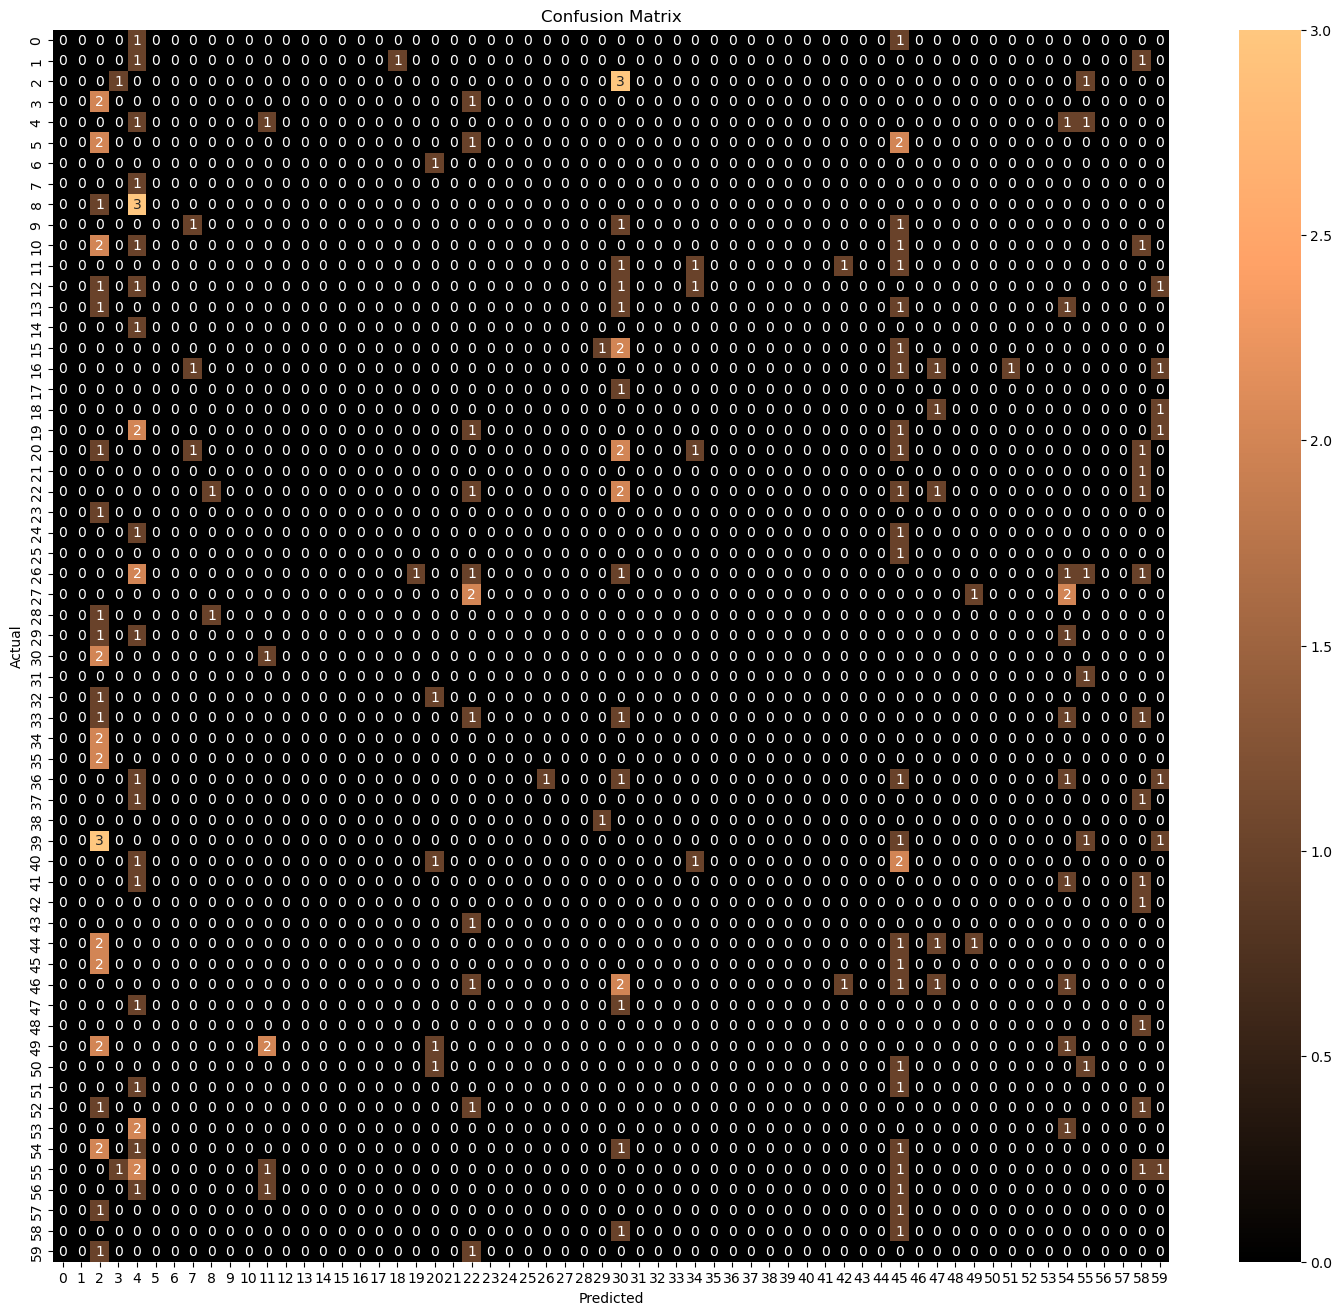

In [92]:
# Confusion matrix for Naive Bayes
confusion_matrix_nb = confusion_matrix(Y_test, y_pred_nb)

##### Show confusion matrix heatmap 
plt.figure(figsize=(18, 16))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

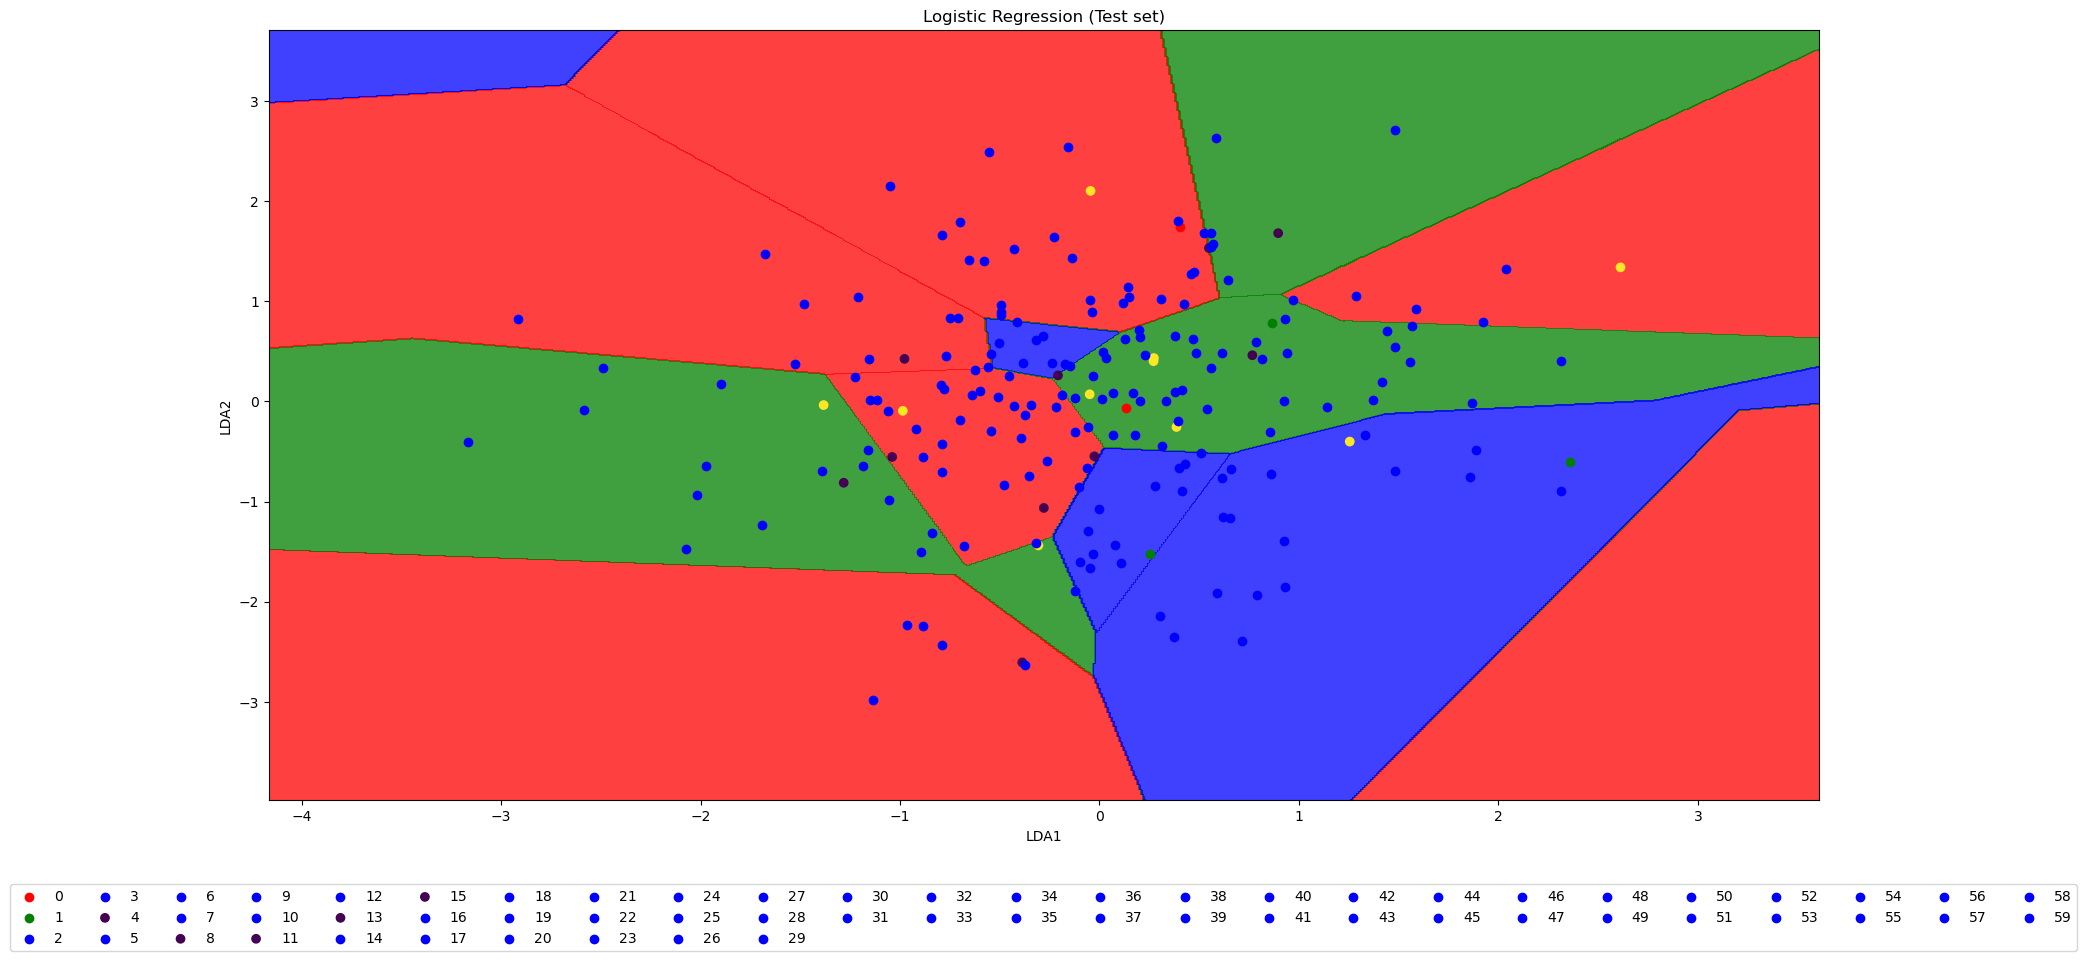

In [103]:
X_set, y_set = X_test_lda, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(20,10))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

# Set limit an axes 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot 
"""
    - `i` represents the class label
    - `j` represents the class value (unique class labels)
For each class, scatter points using the first two features (X_set[:, 0] and X_set[:, 1]).
Use a color from the 'red', 'green', 'blue' colormap based on the class index (i).
Label each scatter plot with the class value (j).
"""
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
# Horizontal legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=25)
plt.show()

### => 4) Random Forest Classifier

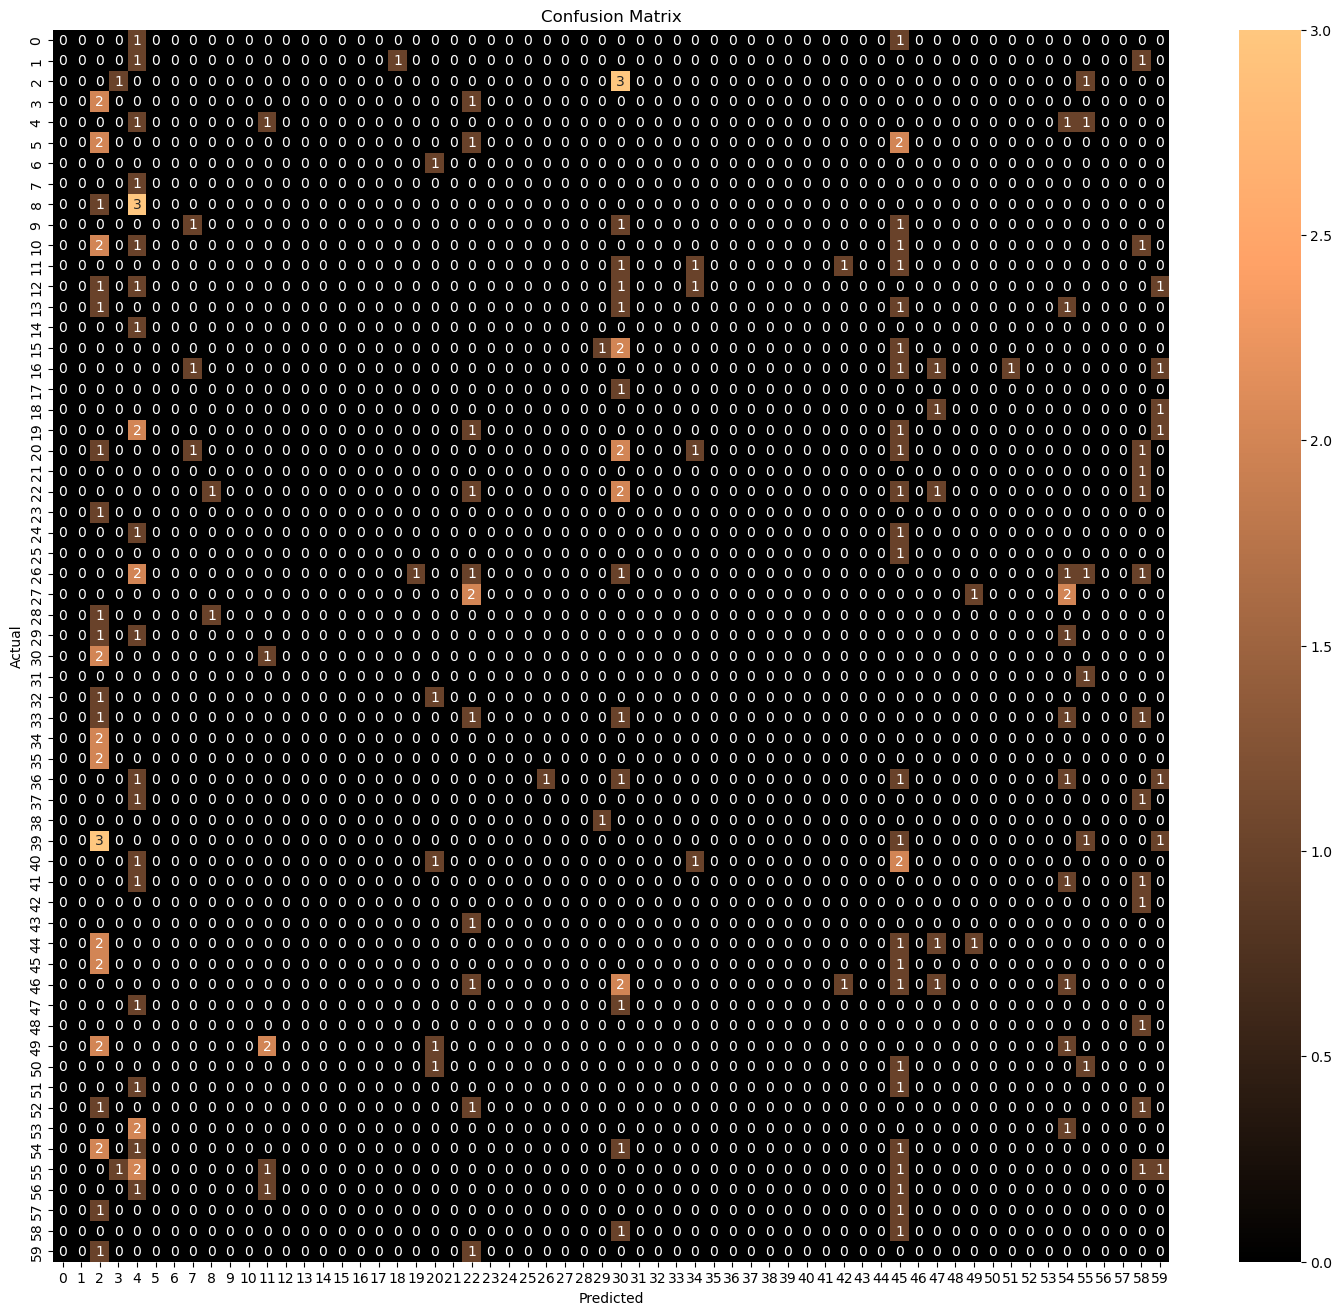

In [112]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the LDA-transformed training data
rf_classifier.fit(X_train_lda, Y_train)

# Make predictions on the LDA-transformed test data
y_pred_rf = rf_classifier.predict(X_test_lda)
y_pred_rf

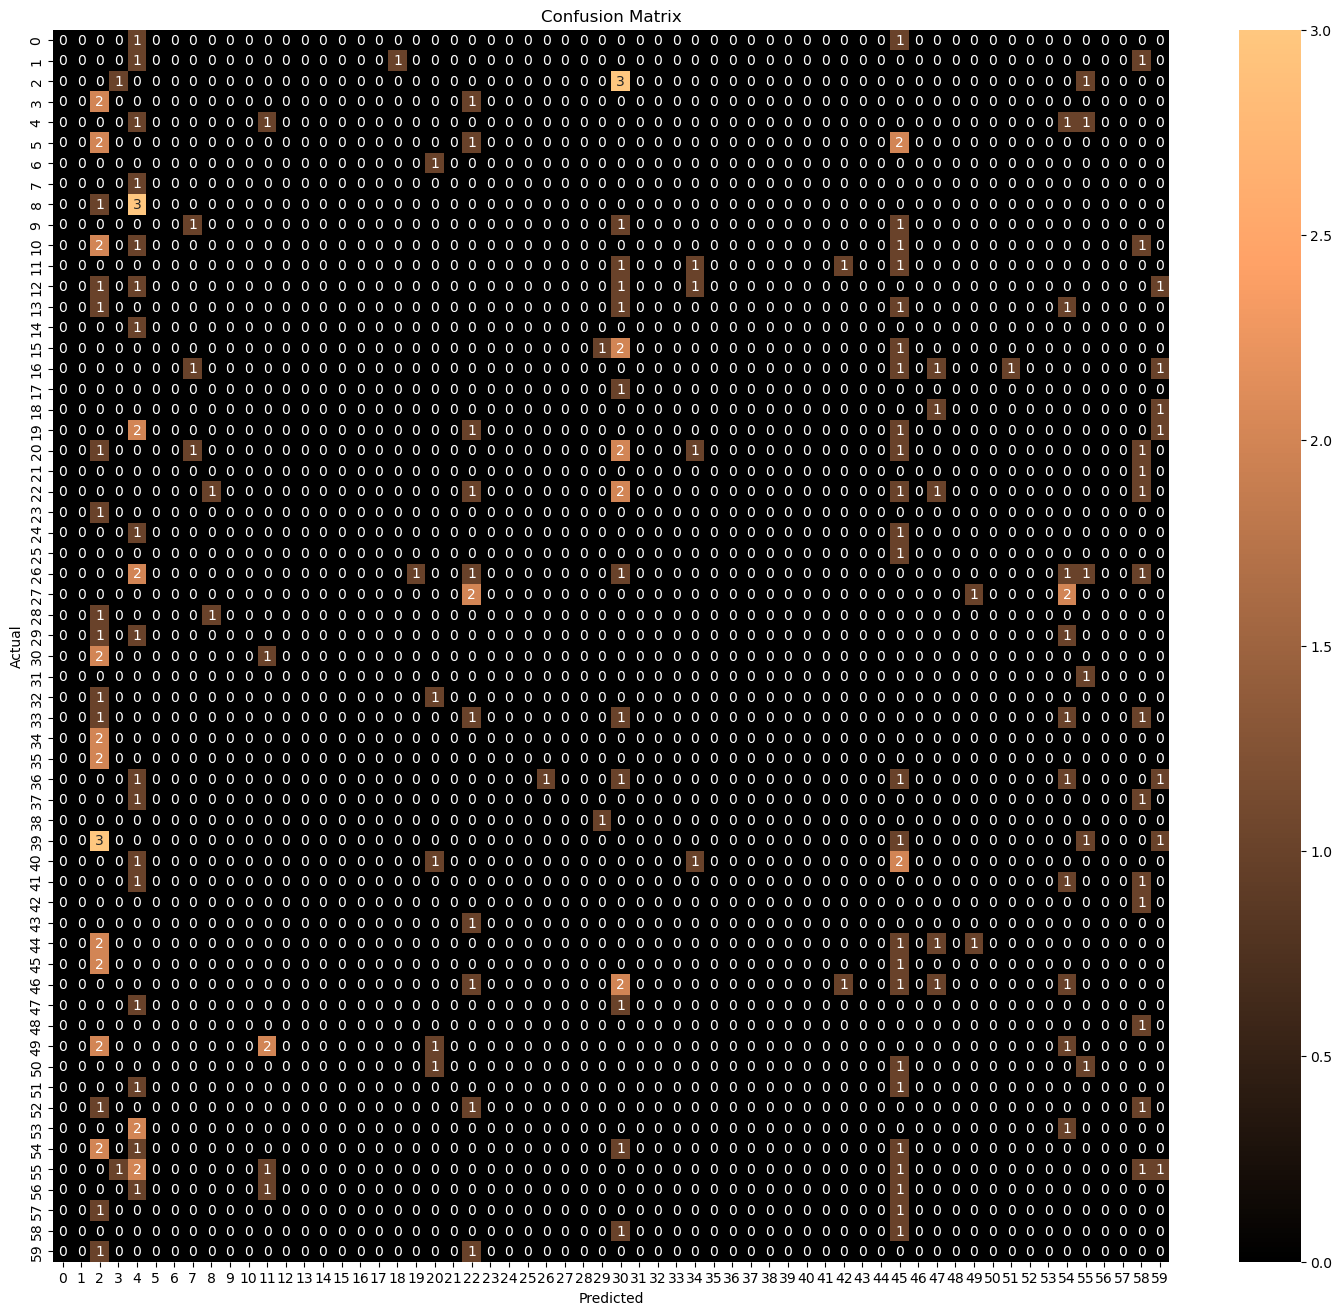

In [113]:
# Confusion matrix for Random Forest
confusion_matrix_rf = confusion_matrix(Y_test, y_pred_rf)

##### Show confusion matrix heatmap 
plt.figure(figsize=(18, 16))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

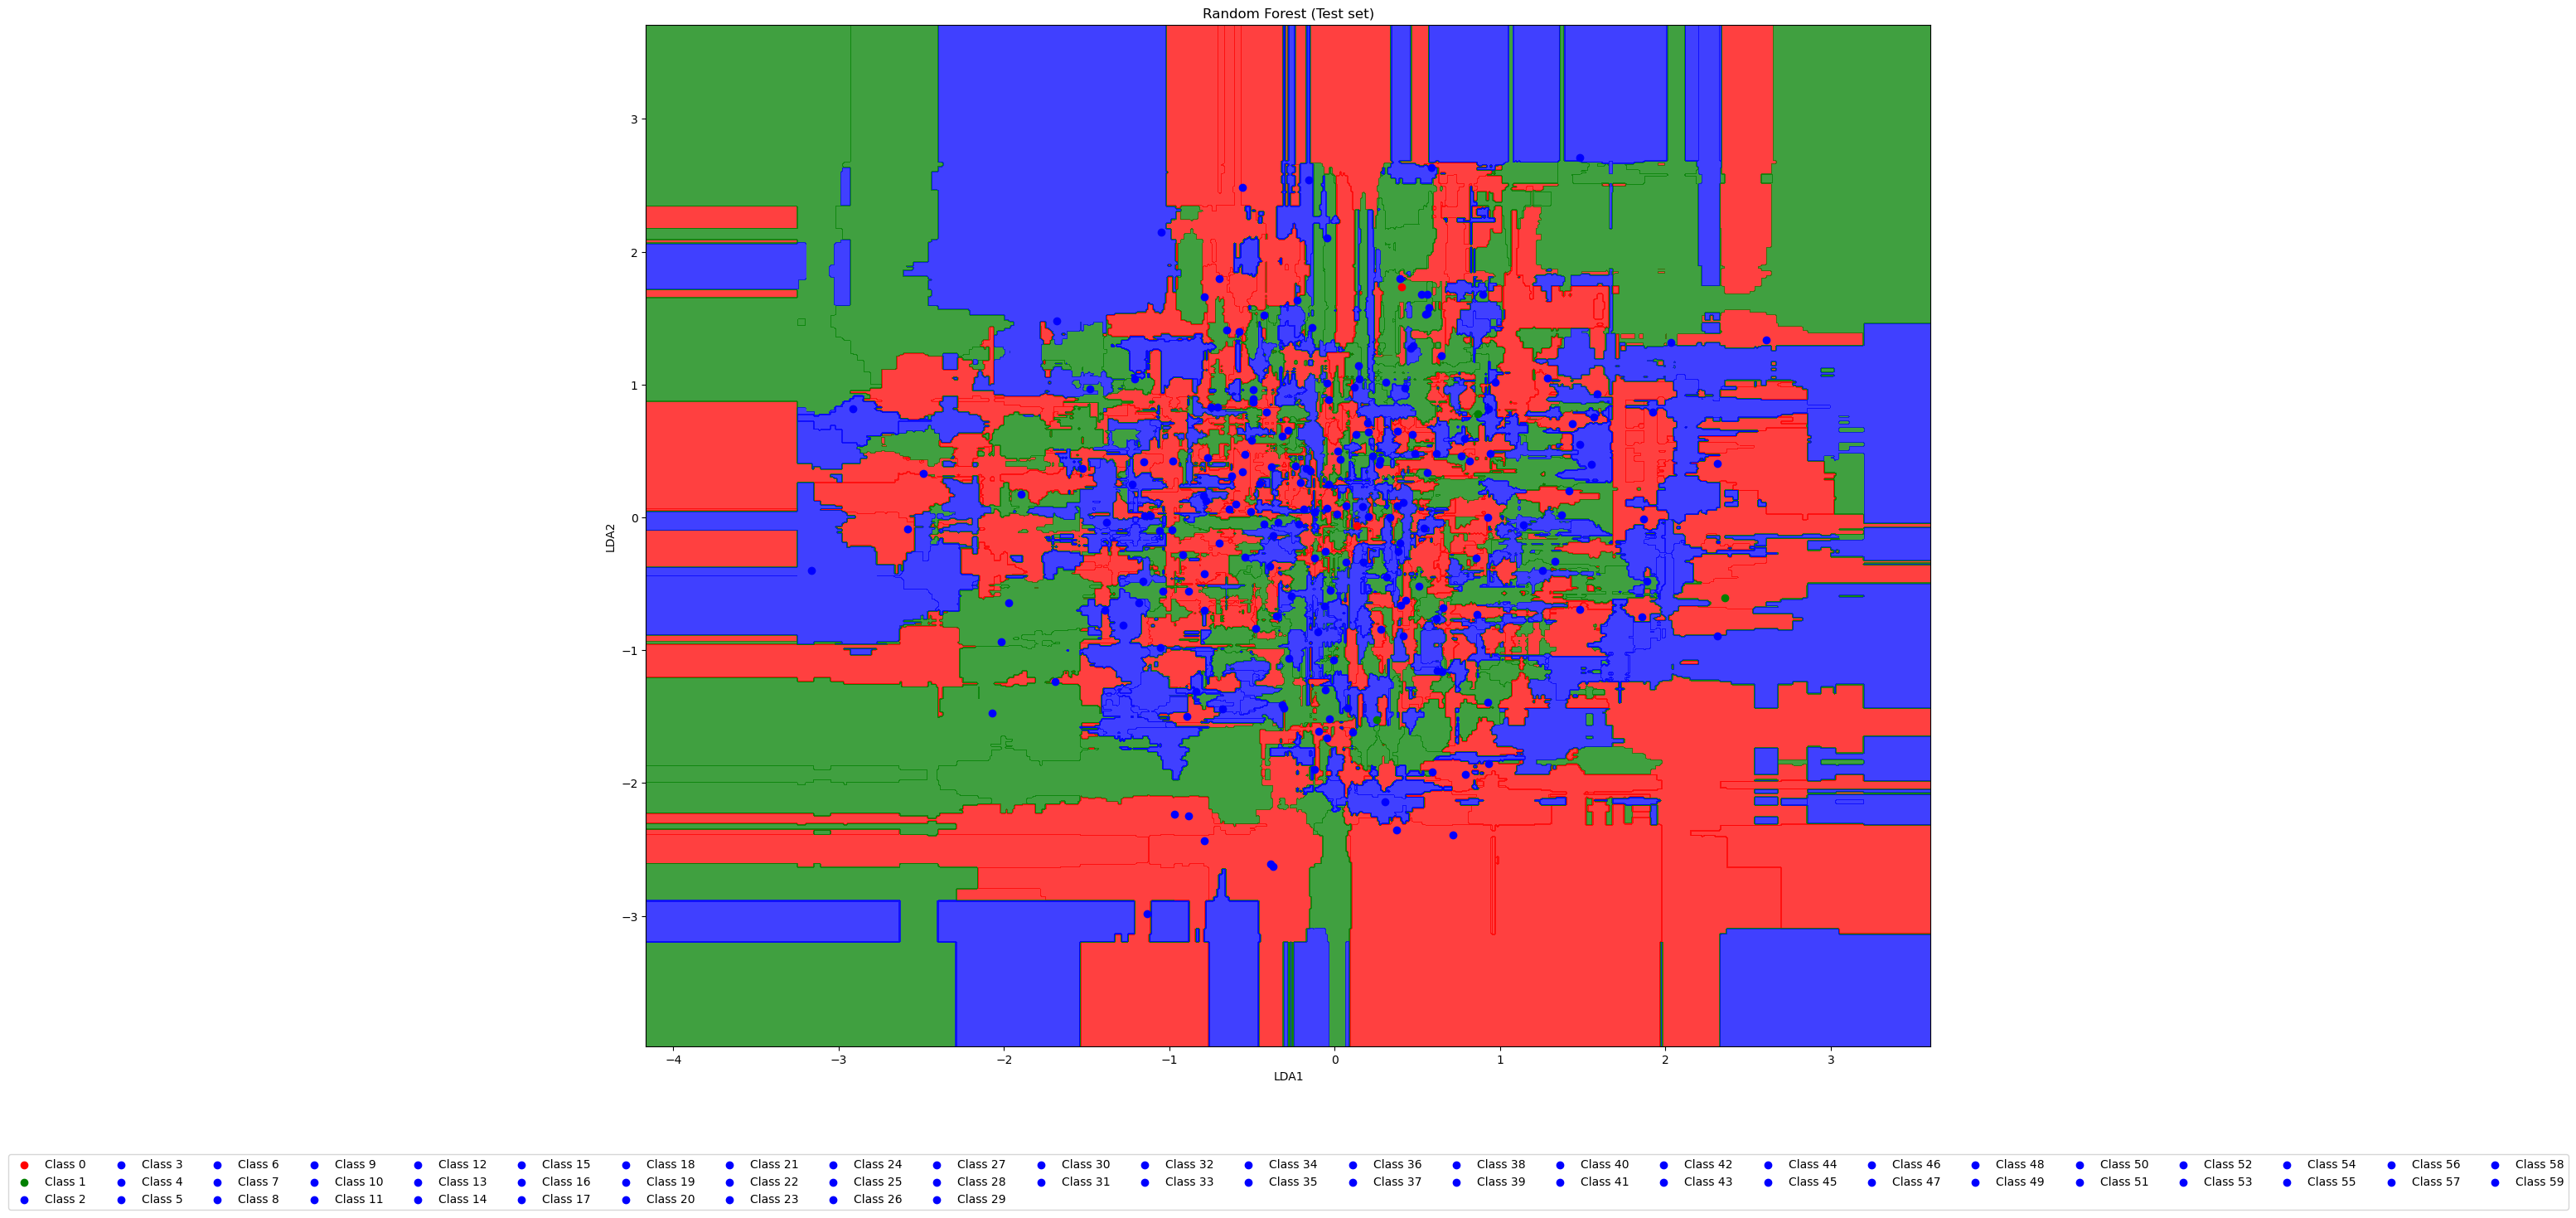

In [115]:
# Scatter plot and labels
X_set, y_set = X_test_lda, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.figure(figsize=(20, 16))
plt.contourf(X1, X2, rf_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

# Set limit an axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot
for i, j in enumerate(np.unique(y_set)):
    x_points = X_set[y_set == j, 0]
    y_points = X_set[y_set == j, 1]
    colors = ListedColormap(('red', 'green', 'blue'))(i)

    # Plot the colored scatter points
    plt.scatter(x_points, y_points, color=colors, label=f'Class {j}')

plt.title('Random Forest (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')

# Horizontal legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=25)
plt.show()

### => 5) SVM

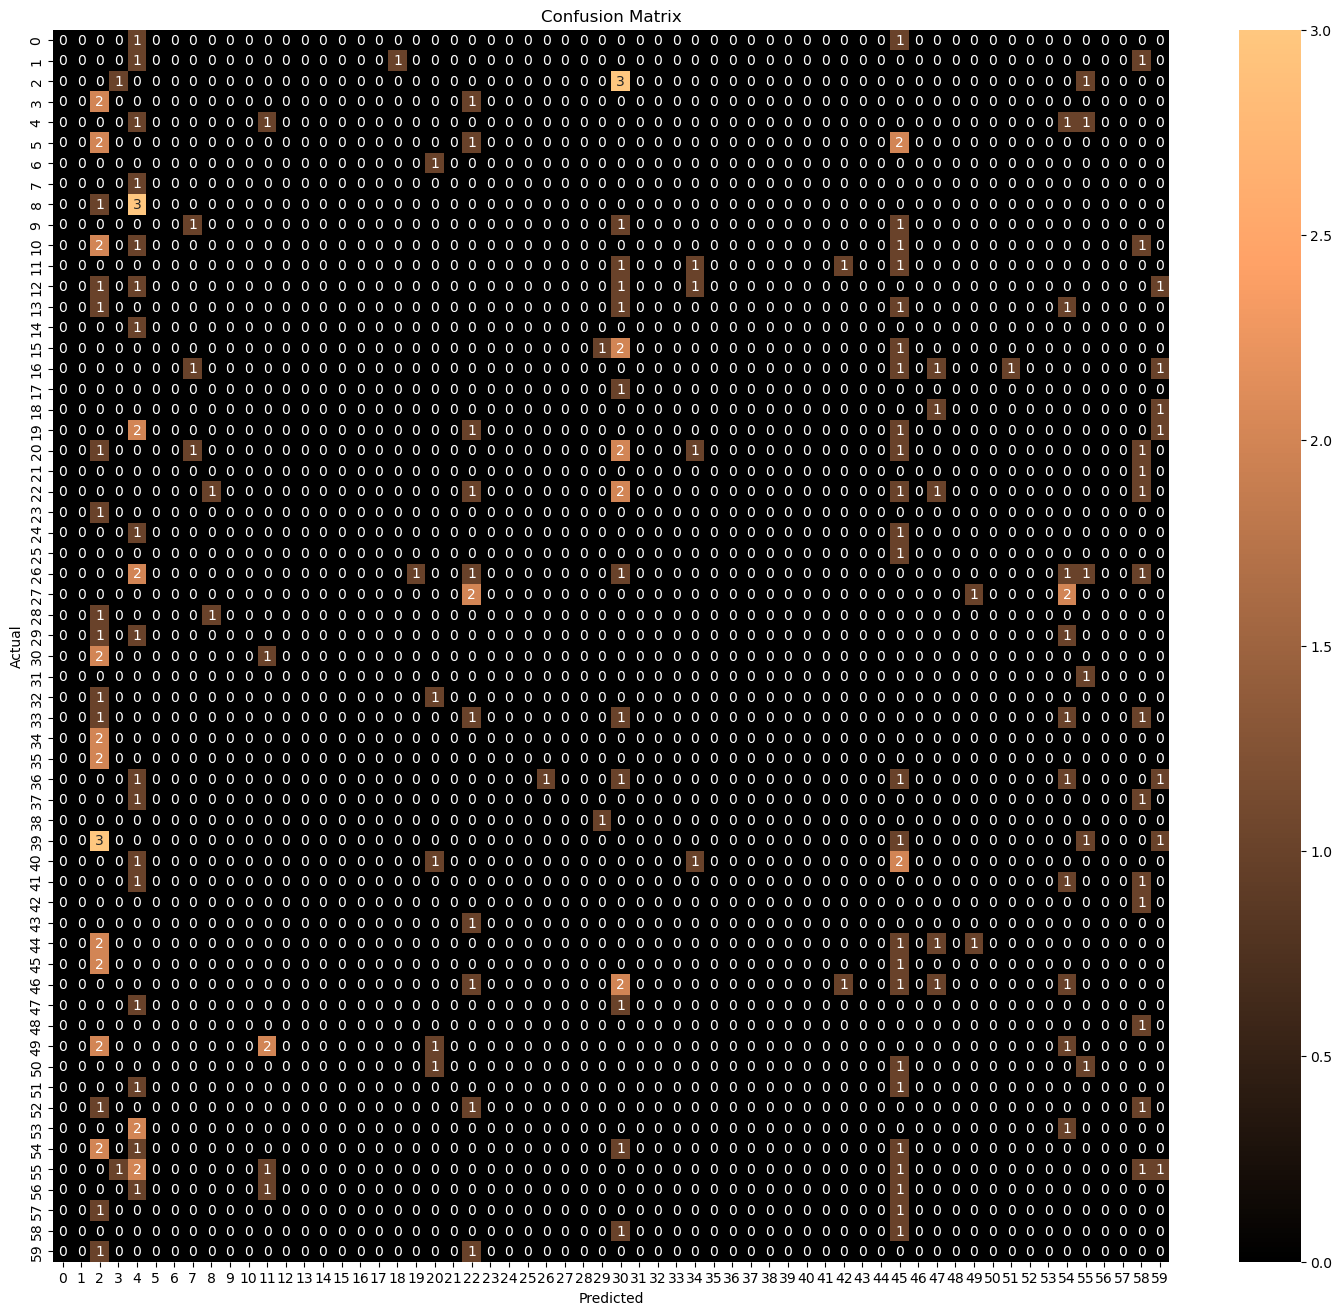

In [116]:
svm_classifier = SVC(kernel='linear', random_state=0)

# Fit the model to the LDA-transformed training data
svm_classifier.fit(X_train_lda, Y_train)
# Make predictions on the LDA-transformed test data
y_pred_svm = svm_classifier.predict(X_test_lda)

# Confusion matrix for SVM
confusion_matrix_svm = confusion_matrix(Y_test, y_pred_svm)

##### Show confusion matrix heatmap 
plt.figure(figsize=(18, 16))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

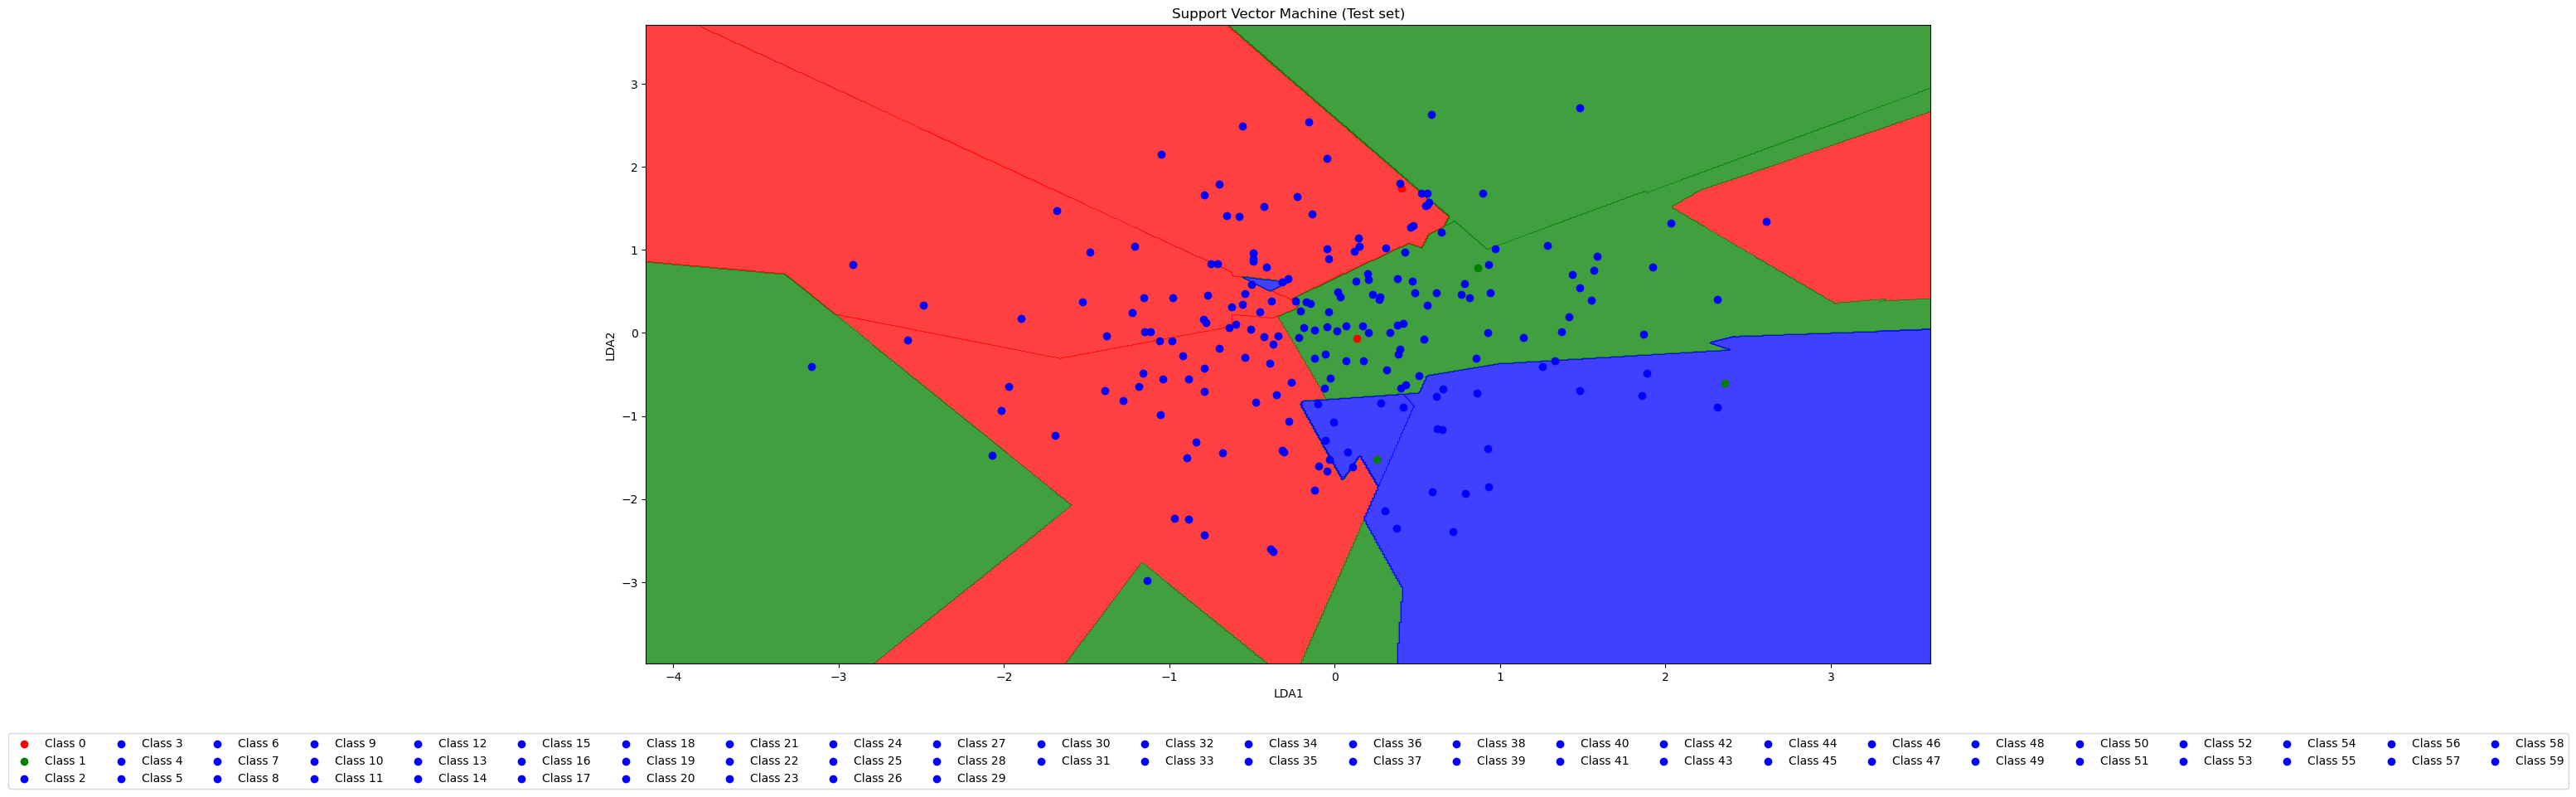

In [120]:
# Scatter plot and labels
X_set, y_set = X_test_lda, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.figure(figsize=(20, 10))
plt.contourf(X1, X2, svm_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

# Set limit an axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot
for i, j in enumerate(np.unique(y_set)):
    x_points = X_set[y_set == j, 0]
    y_points = X_set[y_set == j, 1]
    colors = ListedColormap(('red', 'green', 'blue'))(i)

    # Plot the colored scatter points
    plt.scatter(x_points, y_points, color=colors, label=f'Class {j}')

plt.title('Support Vector Machine (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')

# Horizontal legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=25)
plt.show()


### => 6) Adaboost

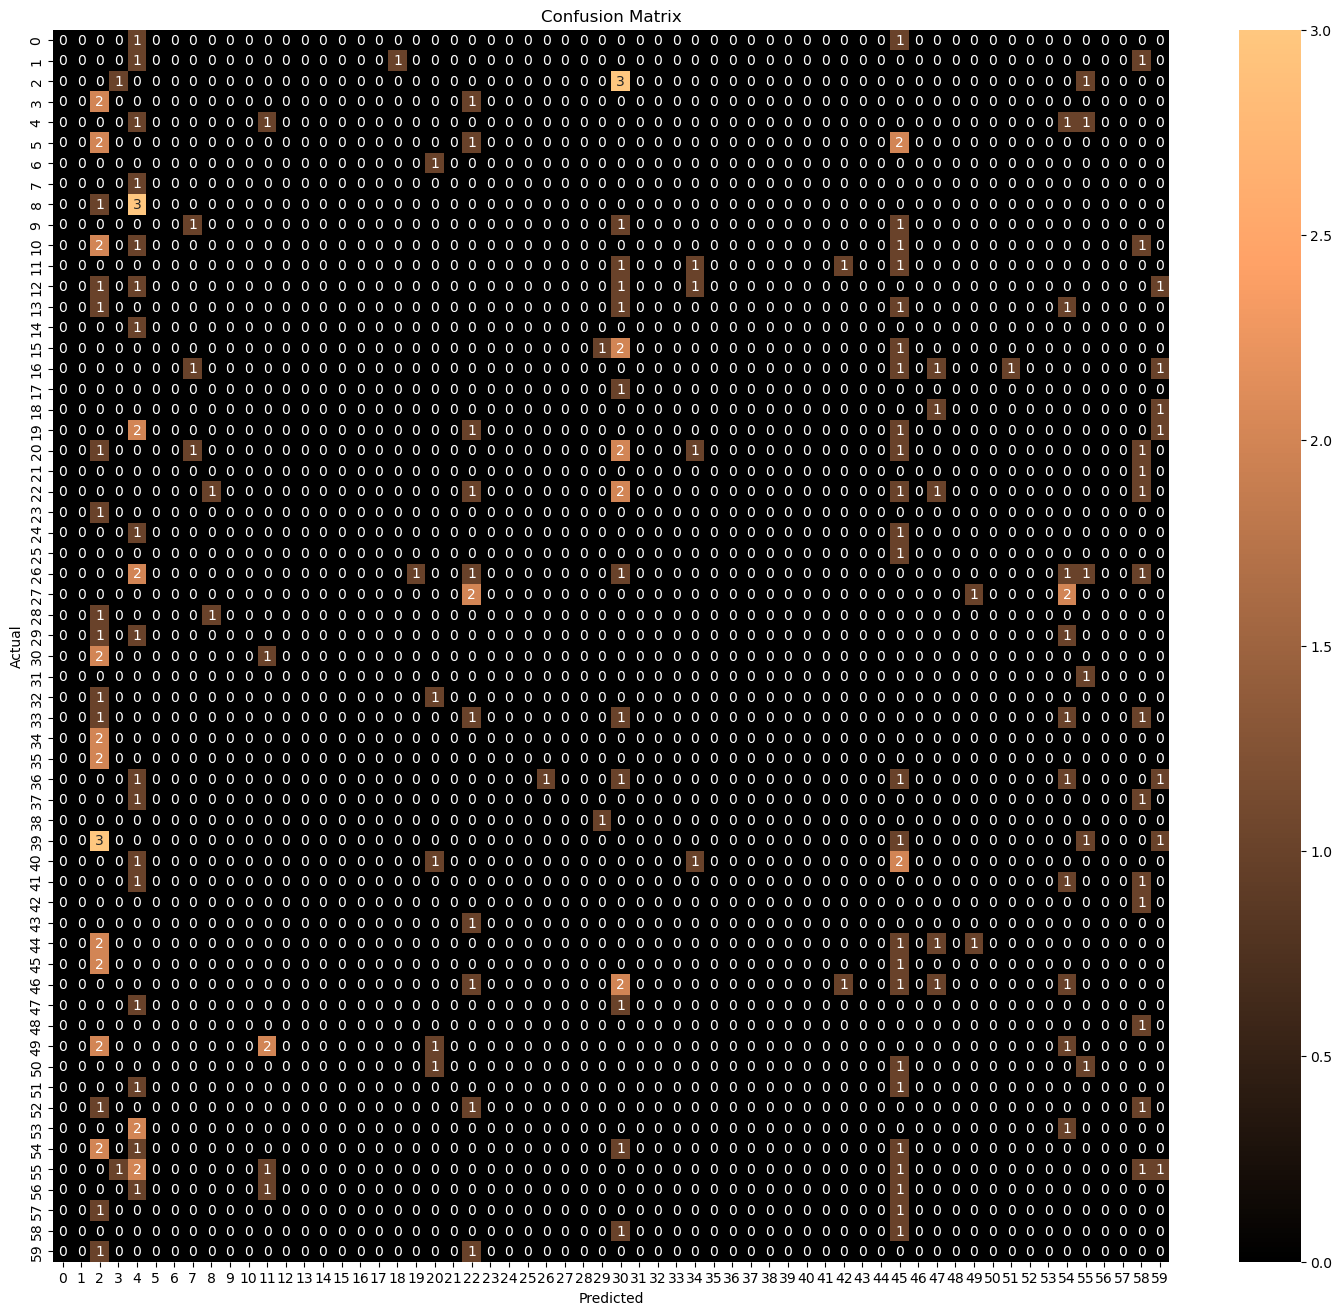

In [121]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)

# Fit the model to the LDA-transformed training data
adaboost_classifier.fit(X_train_lda, Y_train)
# Make predictions on the LDA-transformed test data
y_pred_adaboost = adaboost_classifier.predict(X_test_lda)

# Confusion matrix for AdaBoost
confusion_matrix_adaboost = confusion_matrix(Y_test, y_pred_adaboost)

##### Show confusion matrix heatmap 
plt.figure(figsize=(18, 16))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

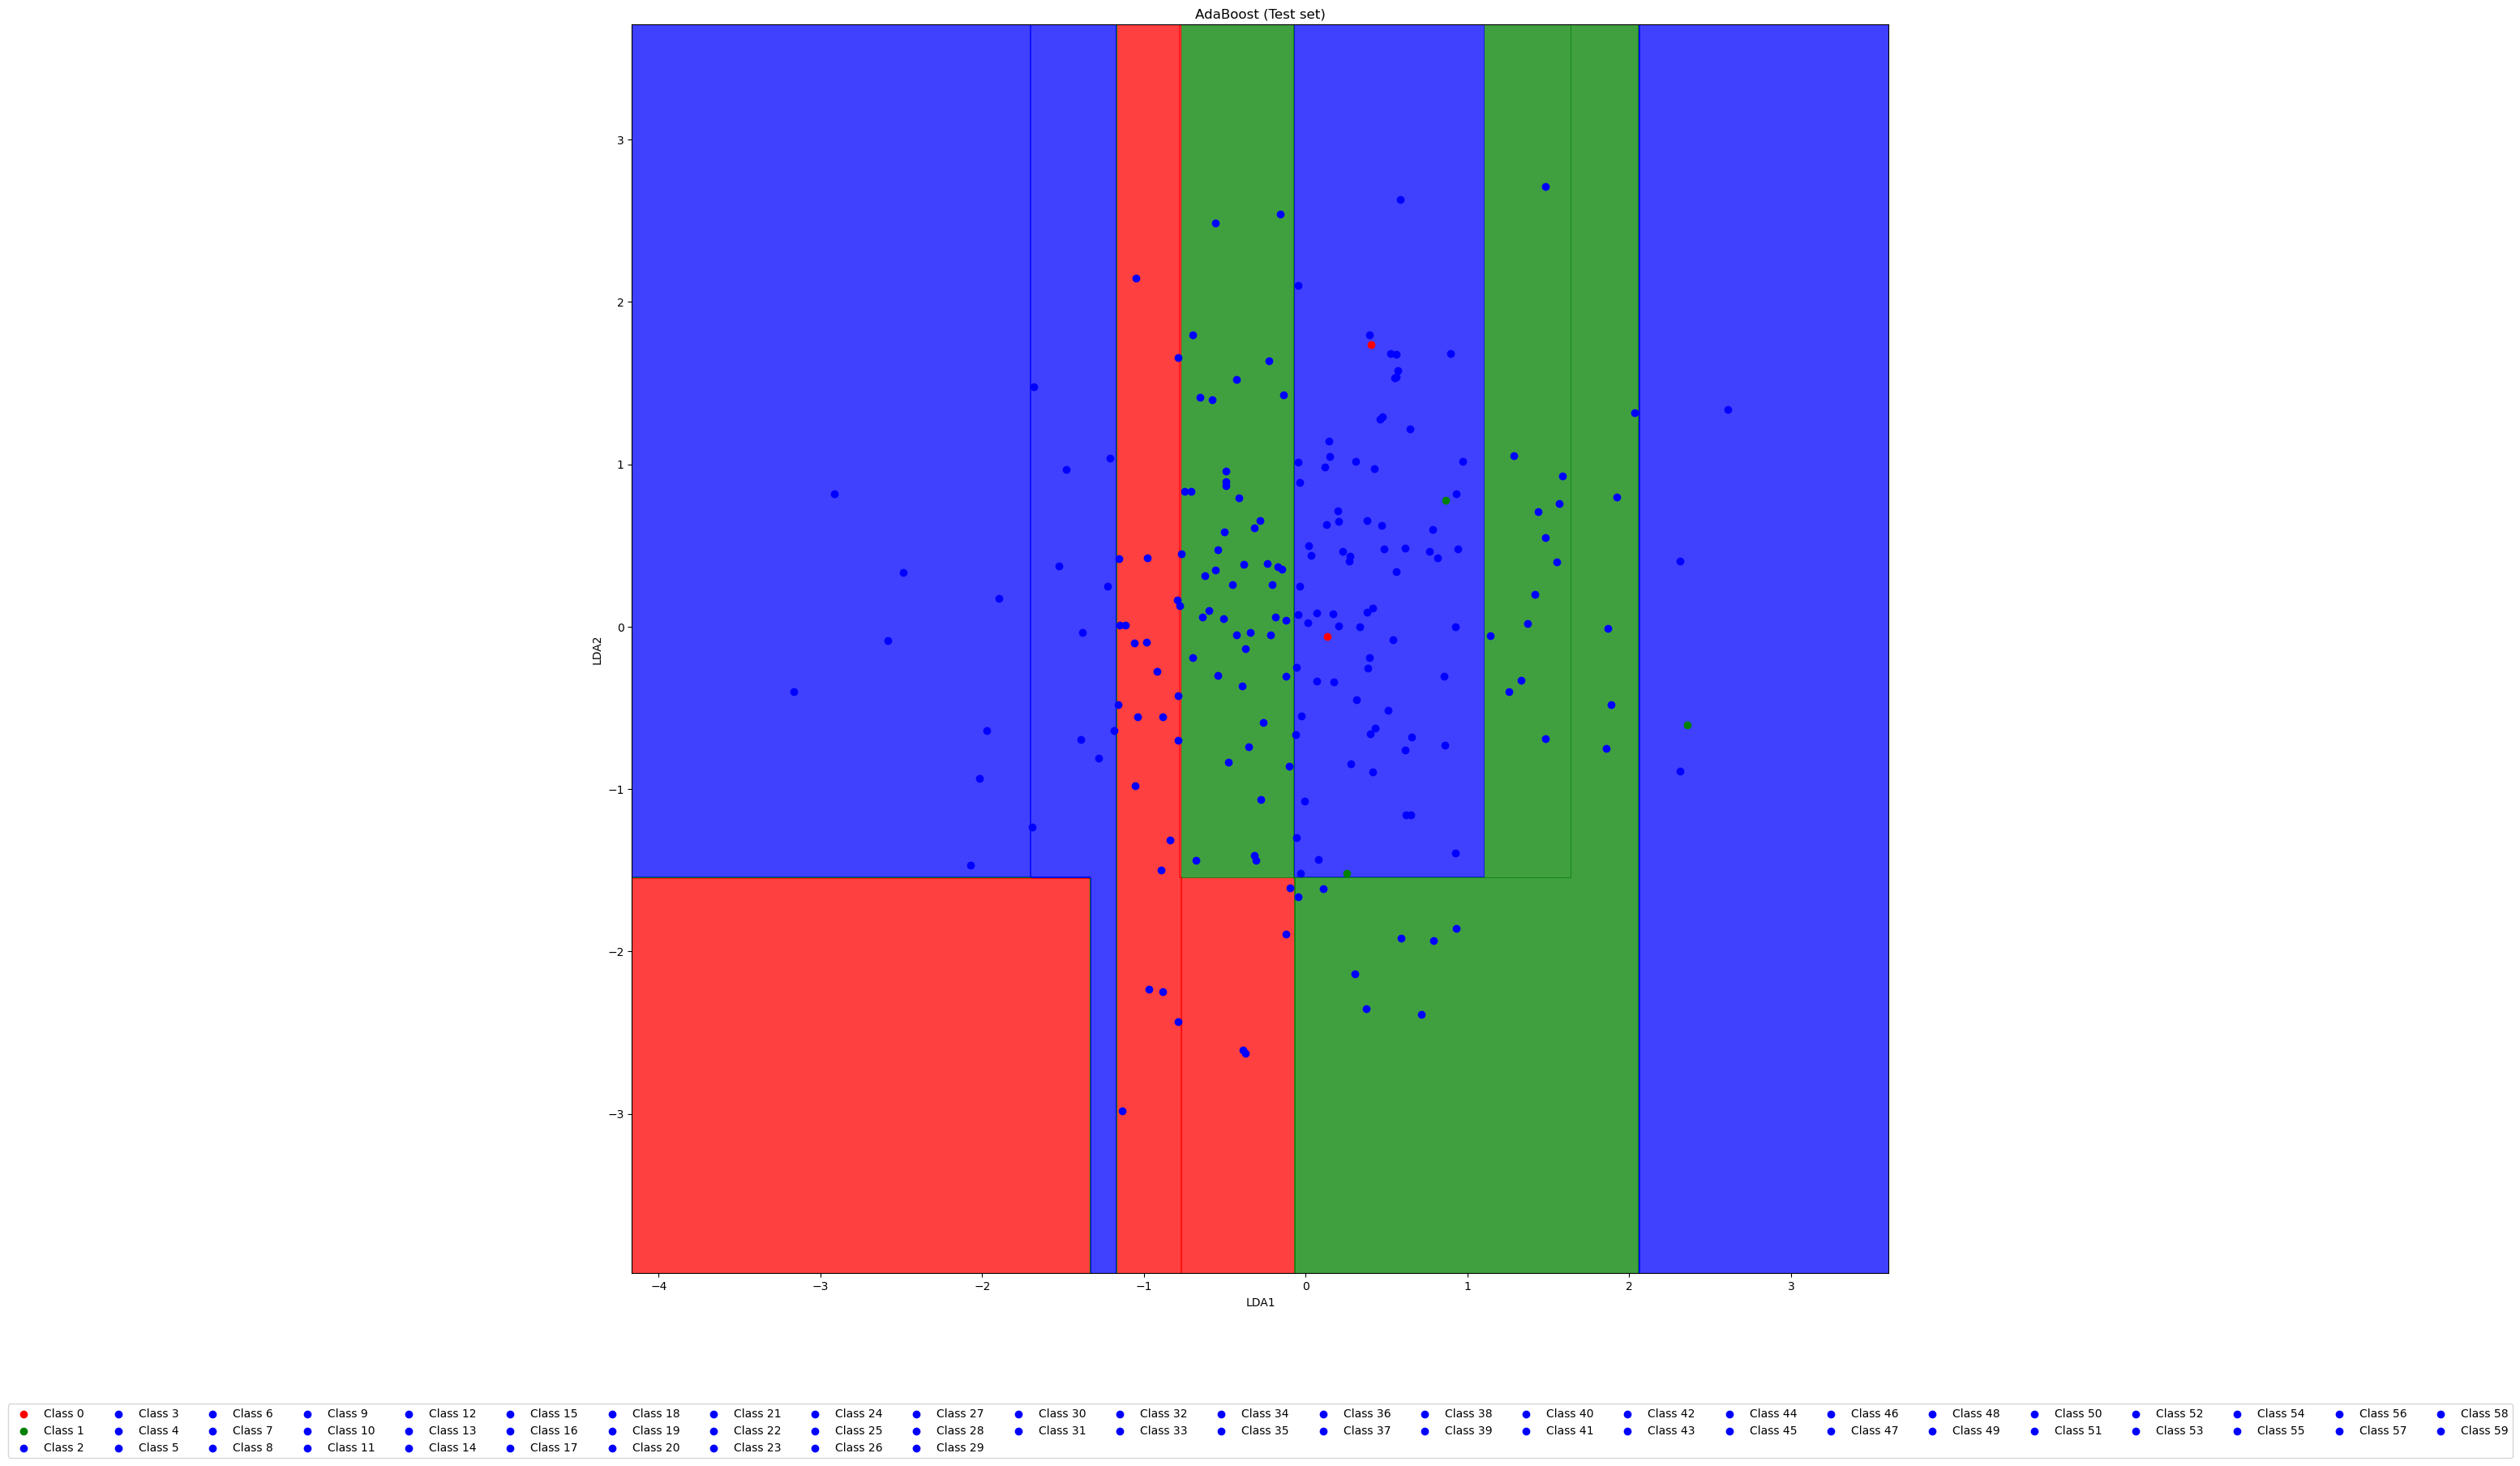

In [124]:
# Scatter plot and labels
X_set, y_set = X_test_lda, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.figure(figsize=(20, 20))
plt.contourf(X1, X2, adaboost_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

# Set limit on axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot
for i, j in enumerate(np.unique(y_set)):
    x_points = X_set[y_set == j, 0]
    y_points = X_set[y_set == j, 1]
    colors = ListedColormap(('red', 'green', 'blue'))(i)

    # Plot the colored scatter points
    plt.scatter(x_points, y_points, color=colors, label=f'Class {j}')

plt.title('AdaBoost (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')

# Horizontal legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=25)
plt.show()